# Digital Linear Filters

Graphical explanation between standard DLF, lagged convolution DLF, and splined DLF.

The initial explanations assume the Hankel transform, hence wavenumber-domain ($k$) to frequency-domain ($f$). But the same applies for the Fourier transform from frequency-domain ($f$) to time-domain ($t$), or for any arbitrary two domains.

Filter weights and the actual DLF are ignored in the explanation, we only look at the required data points in the $k$-domain.

At the bottom I show two examples using `empymod`, one for the Hankel and one for the Fourier transform.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy as dc

# Load dipole- and analytical routines; filters
from empymod import dipole, analytical
from empymod import filters

In [2]:
plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 100

In [3]:
# Points in f-domain
f = np.array([0.2, 0.7, 5, 25, 100])

# Made-up filter base for explanatory purpose
base = np.array([1e-2, 1e-1, 1e0, 1e1, 1e2])

## Standard digital filter

For each point in the frequency-domain you have to calculate $n$ points in the wavenumber-domain, where $n$ is the filter length.

### Implementation in `empymod`

This is the most precise one, as no interpolation is used, but generally the slowest one. It is the default method for the Hankel transform.

For the **Hankel transform**, use these parameters in `empymod.dipole` or `empymod.bipole`:

    ht = 'fht'                     # Default
    opt = None                     # Default
    htarg = {'pts_per_dec': None}  # Default
    
The standard DLF works also with the parallel option, `opt = 'parallel'`.

For the **Fourier transform**, use these parameters in `empymod.dipole` or `empymod.bipole`:

    ft = 'sin' or 'cos'            # Default is 'sin'
    ftarg = {'pts_per_dec': 0}     # Only implemented from empymod v1.5.2 onwards


Points in f-domain   :: 5
Filter length        :: 5
Req. pts in k-domain :: 25


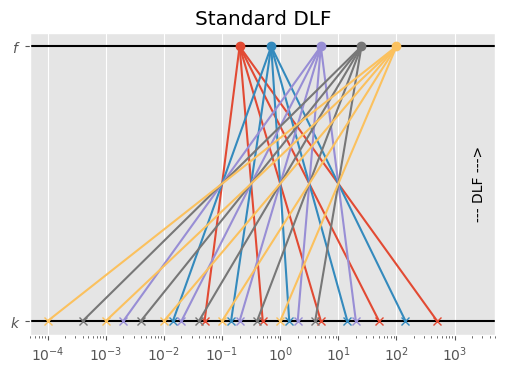

In [4]:
# Required points in the k-domain
k = base/f[:,None]

# Print information
print('Points in f-domain   ::', f.size)
print('Filter length        ::', base.size)
print('Req. pts in k-domain ::', k.size)

# Figure
plt.figure()
plt.title('Standard DLF')
plt.hlines(1, 1e-5, 1e5)
plt.hlines(0, 1e-5, 1e5)

for i, val in enumerate(f):
    for ii, ival in enumerate(k[i, :]):
        plt.plot(ival, 0, 'C'+str(i)+'x')
        plt.plot([ival, val], [0, 1], 'C'+str(i))
    plt.plot(val, 1, 'C'+str(i)+'o')
    
plt.text(2e3, 0.5, '--- DLF --->', rotation=90, va='center')

plt.xscale('log')
plt.yticks([0, 1], (r'$k$', r'$f$'))
plt.xlim([5e-5, 5e3])
plt.show()

## Lagged convolution DLF

The spacing of the filter base is used to get from minimum to maximum required wavenumber; for each complete set the DLF is executed to calculate the frequency-domain response, and interpolation is carried out in the frequency-domain.
  
### Implementation in `empymod`

This is usually the fastest option, and generally still more than sufficiently precise. It is the default method for the Fourier transform.

For the **Hankel transform**, use these parameters in `empymod.dipole` or `empymod.bipole`:

    ht = 'fht'                     # Default
    opt = 'spline'
    htarg = {'pts_per_dec': None}  # Default

For the **Fourier transform**, use these parameters in `empymod.dipole` or `empymod.bipole`:

    ft = 'sin' or 'cos'            # Default is 'sin'
    ftarg = {'pts_per_dec': None}  # Default


Points in f-domain   :: 5
Filter length        :: 5
Req. pts in k-domain :: 8


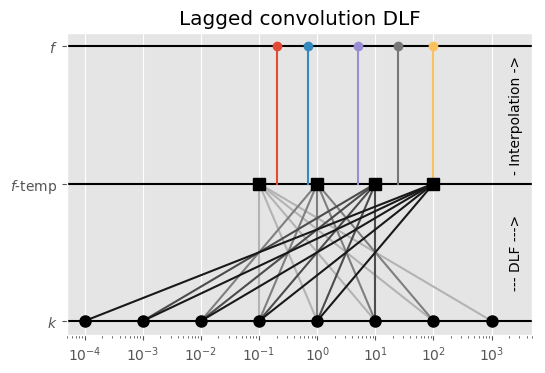

In [5]:
# Required points in the k-domain
k2 = np.array([1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3])

# Intermediat values in the f-domain
f2 = np.array([1e-1, 1e0, 1e1, 1e2])

# Print information
print('Points in f-domain   ::', f.size)
print('Filter length        ::', base.size)
print('Req. pts in k-domain ::', k2.size)

# Figure
plt.figure()
plt.title('Lagged convolution DLF')
plt.hlines(1, 1e-5, 1e5)
plt.hlines(0, 1e-5, 1e5)
plt.hlines(0.5, 1e-5, 1e5)

for i, val in enumerate(f2):
    for ii in range(base.size):
        plt.plot([k2[-1-ii-i], val], [0, 0.5], str(0.7-0.2*i))

for iii, val2 in enumerate(f):
    plt.plot(val2, 1, 'C'+str(iii)+'o')
    plt.plot([val2, val2], [0.5, 1], 'C'+str(iii))

plt.text(2e3, 0.75, '- Interpolation ->', rotation=90, va='center')
plt.text(2e3, 0.25, '--- DLF --->', rotation=90, va='center')

plt.plot(k2, k2*0, 'ko', ms=8)
plt.plot(f2, f2*0+0.5, 'ks', ms=8)
plt.xscale('log')
plt.yticks([0, 0.5, 1], (r'$k$', r'$f$-temp', r'$f$'))
plt.xlim([5e-5, 5e3])
plt.show()

## Splined DLF

In the splined DLF $m$ points per decade are used from minimum to maximum required wavenumber; then the required wavenumbers are interpolated in the wavenumber-domain, and the DLF is exececuted subsequently.

### Implementation in `empymod`

This option can, at times, yield more precise results than the lagged convolution DLF, while being slower than the lagged convolution DLF but faster than the standard DLF. However, you have to carefully choose (or better, test) the parameter `pts_per_dec`.

For the **Hankel transform**, use these parameters in `empymod.dipole` or `empymod.bipole`:

    ht = 'fht'                     # Default
    opt = 'spline'
    htarg = {'pts_per_dec': your_desired_value}
    
For the **Fourier transform**, use these parameters in `empymod.dipole` or `empymod.bipole`:

    ft = 'sin' or 'cos'            # Default is 'sin'
    ftarg = {'pts_per_dec': your_desired_value}


Points in f-domain   :: 5
Filter length        :: 5
Points per decade    :: 3
Req. pts in k-domain :: 22


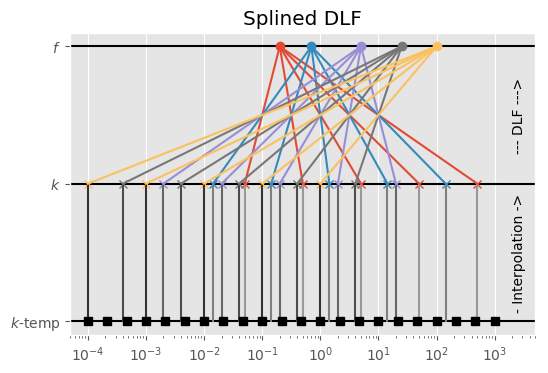

In [6]:
# Required points in the k-domain
kmin = np.log10(k).min()
kmax = np.ceil(np.log10(k).max())
pts_per_dec = 3
k2 = np.logspace(kmin, kmax, int((kmax-kmin)*pts_per_dec+1))

# Print information
print('Points in f-domain   ::', f.size)
print('Filter length        ::', base.size)
print('Points per decade    ::', pts_per_dec)
print('Req. pts in k-domain ::', k2.size)

# Figure
plt.figure()
plt.title('Splined DLF')
plt.hlines(1, 1e-5, 1e5)
plt.hlines(0.5, 1e-5, 1e5)
plt.hlines(0, 1e-5, 1e5)

for i, val in enumerate(f):
    for ii, ival in enumerate(k[i, :]):
        plt.plot(ival, 0.5, 'C'+str(i)+'x')
        plt.plot([ival, ival], [0, 0.5], str(0.6-0.1*i))
        plt.plot([ival, val], [0.5, 1], 'C'+str(i))
    plt.plot(val, 1, 'C'+str(i)+'o')
    
plt.text(2e3, 0.25, '- Interpolation ->', rotation=90, va='center')
plt.text(2e3, 0.75, '--- DLF --->', rotation=90, va='center')

plt.plot(k2, k2*0, 'ks')
plt.xscale('log')
plt.yticks([0, 0.5, 1], (r'$k$-temp', r'$k$', r'$f$'))
plt.xlim([5e-5, 5e3])
plt.show()

## Example for the Hankel transform

The following is an example for the Hankel transform. Be aware that the actual differences in time and accuracy depend highly on the model. If time or accuracy is a critical issue in your calculation I suggest to run some preliminary tests.
It also depends heavily if you have many offsets, or many frequencies, or many layers, as one method might be better for many frequencies but few offsets, but the other method might be better for many offsets but few frequencies.

As general rules we can state that

- the longer the used filter is, or
- the more offsets you have

the higher is the time gain you get by using the lagged convolution or splined version of the DLF.

Here we compare the analytical halfspace solution to the numerical result, using the standard DLF, the lagged convolution DLF, and the splined DLF. Note the oscillating behaviour of the error of the lagged convolution and the splined versions, which comes from the interpolation and is not present in the standard version.

### Define model, calculate analytical solution

In [7]:
x = (np.arange(1, 1001))*10
params = {
    'src': [0, 0, 150],
    'rec': [x, x*0, 200],
    'depth': 0,
    'res': [2e14, 1],
    'freqtime': 1,
    'ab': 11,
    'aniso': [1, 2],
    'xdirect': False,
    'verb': 0,
}

# Used Hankel filter
hfilt = filters.key_201_2009()

# Calculate analytical solution
resp = analytical(params['src'], params['rec'], params['res'][1], params['freqtime'],
                  solution='dhs', aniso=params['aniso'][1], ab=params['ab'], verb=params['verb'])

### Calculate numerically the model using different Hankel options

In [8]:
standard = dipole(**params, opt=None, htarg=hfilt)
laggedco = dipole(**params, opt='spline', htarg=hfilt)
spline10 = dipole(**params, opt='spline', htarg=[hfilt, 10])
spline30 = dipole(**params, opt='spline', htarg=[hfilt, 30])
splin100 = dipole(**params, opt='spline', htarg=[hfilt, 100])

### Results

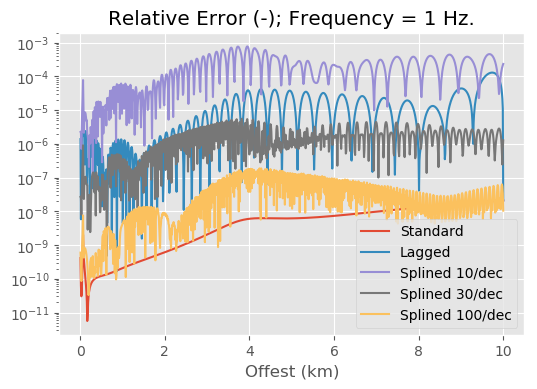

In [9]:
plt.figure()

plt.title('Relative Error (-); Frequency = '+str(params['freqtime'])+' Hz.')
plt.semilogy(x/1000, np.abs((standard-resp)/resp), label='Standard')
plt.semilogy(x/1000, np.abs((laggedco-resp)/resp), label='Lagged')
plt.semilogy(x/1000, np.abs((spline10-resp)/resp), label='Splined 10/dec')
plt.semilogy(x/1000, np.abs((spline30-resp)/resp), label='Splined 30/dec')
plt.semilogy(x/1000, np.abs((splin100-resp)/resp), label='Splined 100/dec')
plt.xlabel('Offest (km)')
plt.legend()

plt.show()

Runtimes and number of required wavenumbers for each method:

Hankel DLF Method  | Time (ms) | # of wavenumbers
-------------------|-----------|-----------------
Standard           | 169       | 201000
Lagged Convolution |   4       | 295
Splined 10/dec     |  95       | 219
Splined 30/dec     |  98       | 653
Splined 50/dec     | 111       | 2172


So the lagged convolution has a relative error between roughly 1e-6 to 1e-4, hence 0.0001 % to 0.01 %, which is more then enough for real-world applications.

If you want to measure the runtime on your machine set `params['verb'] = 2`.

Note: If you use the splined version with about 500 samples per decade you get about the same accuracy as in the standard version. However, you get also about the same runtime.

## Example for the Fourier transform

The same now for the Fourier transform. Obviously, when we use the Fourier transform we also use the Hankel transform. However, in this example we use only one offset. If there is only one offset then the lagged convolution or splined DLF for the Hankel transform do not make sense, and the standard is the fastest. So we use the standard Hankel DLF here. If you have many offsets then that would be different.

As general rules we can state that

- the longer the used filter is, or
- the more times you have

the higher is the time gain you get by using the lagged convolution or splined version of the DLF.

### Define model, calculate analytical solution

In [10]:
t = np.logspace(0, 2, 100)
xt = 2000

tparam = dc(params)
tparam['rec'] = [xt, 0, 200]
tparam['freqtime'] = t
tparam['signal'] = 0  # Impulse response

# Used Fourier filter
ffilt = filters.key_81_CosSin_2009()

# Calculate analytical solution
tresp = analytical(tparam['src'], tparam['rec'], tparam['res'][1], tparam['freqtime'],
                   signal=tparam['signal'], solution='dhs', aniso=tparam['aniso'][1],
                   ab=tparam['ab'], verb=tparam['verb'])

### Calculate numerically the model using different Fourier options

In [11]:
tstandard = dipole(**tparam, opt=None, htarg=hfilt, ftarg=[ffilt, 0])
tlaggedco = dipole(**tparam, opt=None, htarg=hfilt, ftarg=[ffilt, None])
tsplined4 = dipole(**tparam, opt=None, htarg=hfilt, ftarg=[ffilt, 4])
tspline10 = dipole(**tparam, opt=None, htarg=hfilt, ftarg=[ffilt, 10])

### Results

**NOTE:**; The standard DLF for the Fourier transform (`ftarg={'pts_per_dec': 0}`) is only available from `empymod v1.5.2` onwards. This is currently (22 April 2018) not released yet, so you have to use the development version of `empymod` to use it. However, this is only of academic interest, in real-world usage I would never use the standard DLF, but the lagged convolution or a splined one.

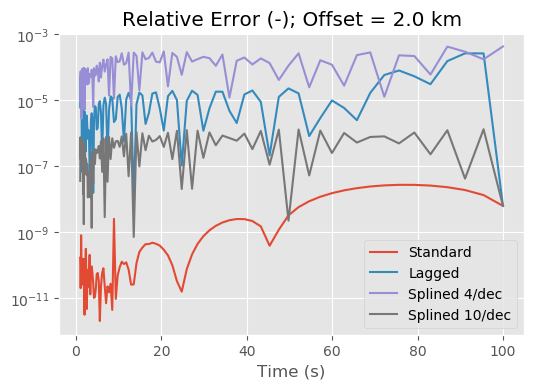

In [12]:
plt.figure()

plt.title('Relative Error (-); Offset = '+str(xt/1000)+' km')
plt.semilogy(t, np.abs((tstandard-tresp)/tresp), label='Standard')
plt.semilogy(t, np.abs((tlaggedco-tresp)/tresp), label='Lagged')
plt.semilogy(t, np.abs((tsplined4-tresp)/tresp), label='Splined 4/dec')
plt.semilogy(t, np.abs((tspline10-tresp)/tresp), label='Splined 10/dec')
plt.xlabel('Time (s)')
plt.legend()

plt.show()

Runtimes and number of required frequencies for each method:

Fourier DLF Method | Time (ms) | # of frequencies
-------------------|-----------|-----------------
Standard           | 1442      | 8100
Lagged Convolution |   17      |  105
Splined 4/dec      |   14      |   84
Splined 10/dec     |   32      |  208

All methods require 201 wavenumbers (1 offset, filter length is 201).

So the lagged convolution has a relative error of roughly 1e-5, hence 0.001 %, which is more then enough for real-world applications.

If you want to measure the runtime on your machine set `tparam['verb'] = 2`.

In [13]:
from empyscripts import versions
versions('HTML')